<a href="https://colab.research.google.com/github/TaufiqueSekh/Customer-Churn-Prediction-using-Decision-Trees/blob/main/Customer_Churn_Prediction_using_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction using Decision Trees


We will be building a decision tree-based Churn rate prediction model for an investment bank so that they can retain more customers.

Key Points:-

1. Problem Statement
2. Understanding Churn prediction Dataset
3. Data preprocessing Steps
4. Exploratory Data Analysis
5. Model Building
6. Model Evaluation

## 1. Problem statement for Churn Prediction

Understanding the problem statement is the first step of model building. Here we are given a dataset of bank customers, and we want to build a churn prediction model that can classify customers into two classes: potential churners and non-churners. This classification problem is solved via a supervised learning approach, meaning we will have labelled Input and Output data samples. This model should be precise as it might affect the future investments of the bank. Now, let's study the Dataset in detail.

## 2. Understanding the Dataset for churn prediction

The Dataset we used to build the model is available on Kaggle and can be downloaded from "https://github.com/TaufiqueSekh/Customer-Churn-Prediction-using-Decision-Trees" 

There are 14 columns/features and 10k rows/samples.

Let's see the effect of these features on the model's prediction.

CreditScore — can affect customer churn since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer's location can affect their decision to leave the bank.

Tenure — refers to the number of years the customer has been a bank's client. Usually, older clients are more loyal and less likely to leave a bank.

Balance — is also an excellent indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank than those with lower balances.

NumOfProducts — refers to the number of products a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant since people with credit cards are less likely to leave the bank.

IsActiveMember — active customers are less likely to leave the bank.

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank than those with higher wages.

Exited — The target column tells whether the customer is a potential churner.
Other columns are RowNumber, CustomerId, Surname, Gender, and Age, having their usual meaning.

Let's look at some rows of the Dataset and the different datatypes used to store them.

In [3]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Here we can infer that columns Rownumber, CustomerId, and Surname only describe customers uniquely and do not affect the target variable, so we can drop these columns. 

The other observation is we have two more categorical columns, geography, and gender, which we will encode using labelencoder() provided by the sklearn library of python.


In [6]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Data preprocessing Steps


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 3. i) Checking the presence of null values 

In [8]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing or duplicate value in any column. Hence we do not need to drop anything. Otherwise, we can use df.dropna() to drop them.

In [9]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

###  Plot Boxplot to check outliers

In [10]:
numcols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

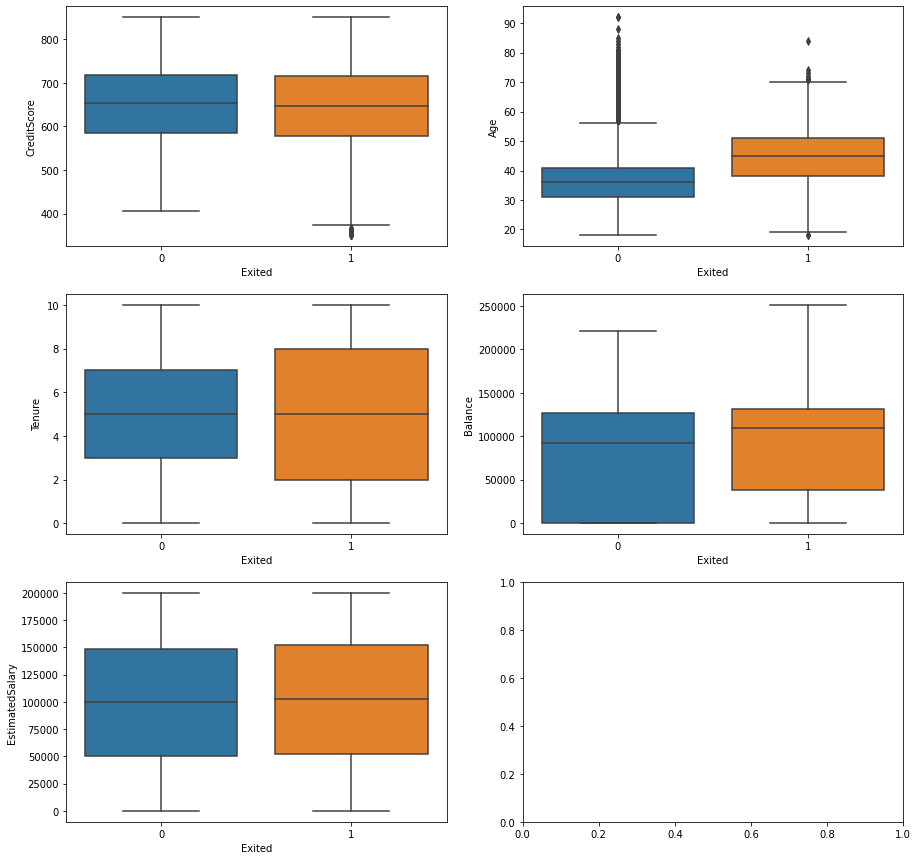

In [11]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i, subplot in zip(numcols, ax.flatten()):
    sns.boxplot(x = 'Exited', y = i , data = df, ax = subplot)
    
plt.show()

#### Removing outliers.

Outliers are those data samples that are present far from the other data samples. They drastically affect the learning of the model and manipulate the predictions towards them. There are two standard methods to remove outliers:
1. Inter Quartile Range (IQR) or 
2. Standard deviation. 

We will be using the IQR method to remove the outliers:

In [12]:
for i in numcols:
    q75, q25 = np.percentile(df[i], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    
    df=df[(df[i]<max_val)]
    df=df[(df[i]>min_val)]

We have removed outliers from the customer dataset and can validate from the boxplot.

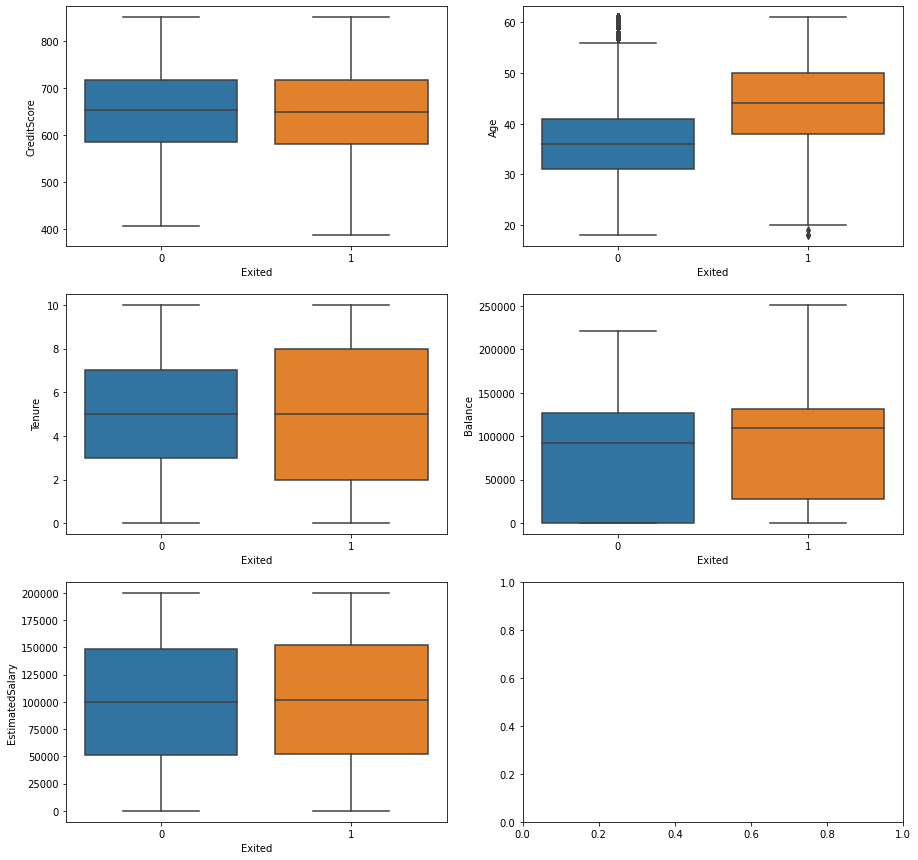

In [13]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i, subplot in zip(numcols, ax.flatten()):
    sns.boxplot(x = 'Exited', y = i , data = df, ax = subplot)
    
plt.show()

The age column still has some outliers but fewer than before data preprocessing. The plots show that the data is balanced around the box's centre line except for the Balance column. Boxplot also helps in finding out the distribution of data around the quartiles.



#### Transform non-numerical labels to numerical labels.
We have two more categorical columns, geography, and gender, which we will encode using labelencoder() provided by the sklearn library of python.

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
df['Geography']=le.fit_transform(df['Geography'])

In [17]:
df['Gender']=le.fit_transform(df['Gender'])

In [18]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## 4. Exploratory Data Analysis of Bank Customers Dataset



### Heatmap showing the correlation of features.
Heatmap is the tabular representation of the correlation of features. We study heatmaps to determine features' dependency on other features and the target variable. Observing the heatmap below, the features are independent because their correlation values are near zero.



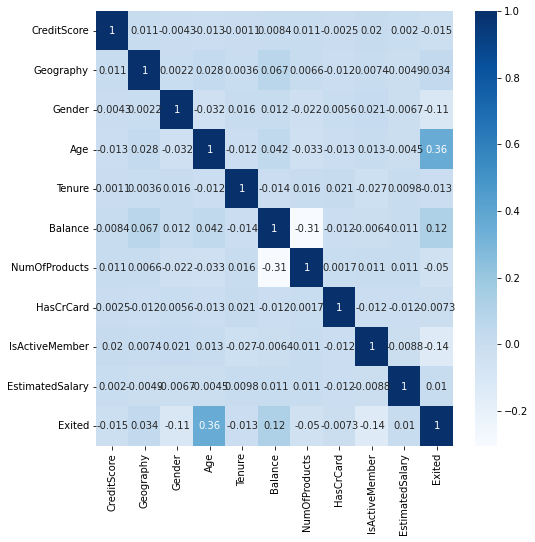

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

##### Counterplots to show the trend of features w.r.t target

Counterplots are best for observing feature values with the target variable. We can see that females have more churners, and people with credit cards are less likely to turn their back on the banks. Similarly, active customers with their transactions or bank visits are less likely to leave or change the bank.

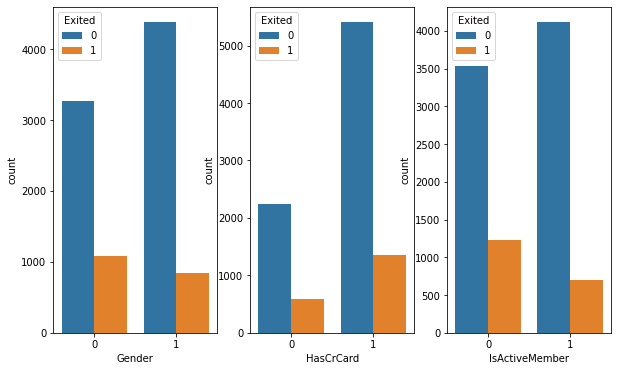

In [21]:
fig, ax = plt.subplots(1,3, figsize = (10,6))
categorical_features=['Gender','HasCrCard','IsActiveMember']
for i, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(x = i, hue="Exited", data = df, ax = subplot)

plt.show()

These observations suggest that banks should spend more money on maintaining the quality of service and retaining their customers. Products like credit cards, loans, tax rebates, and fixed deposits are essential to hook customers and ensure their engagement.



## 5. Model Building

We are ready to build our Customer churn prediction model! But first, we must select which machine learning algorithm is best for churn prediction.

We have a small dataset of 10000 rows. Thus, we need an algorithm that learns well even with a small training data size. A decision tree is the best option because tree-based algorithms are easy to implement, have great explainability, work well with a small dataset, and require minimal data preprocessing.




In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [23]:
dtree=DecisionTreeClassifier()

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [25]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
dtree_predict=dtree.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [30]:
print(f" Classification report :\n {classification_report(y_test,dtree_predict)}")

 Classification report :
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      2290
           1       0.44      0.46      0.45       582

    accuracy                           0.77      2872
   macro avg       0.65      0.66      0.65      2872
weighted avg       0.78      0.77      0.77      2872



In [ ]:
#Model performance before tuning parameters

#Accuracy (Test Set): 0.78F1-Score (Test Set): 0.47

#Model performance after tuning parameters

#Accuracy (Test Set): 0.83F1-Score (Test Set): 0.52print(f" Confusion Matrix  :\n {confusion_matrix(y_test,dtree_predict)}")

SyntaxError: invalid syntax (<ipython-input-31-cfbefa290f98>, line 1)

In [32]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, dtree_predict))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, dtree_predict))

Accuracy (Test Set): 0.77
F1-Score (Test Set): 0.45


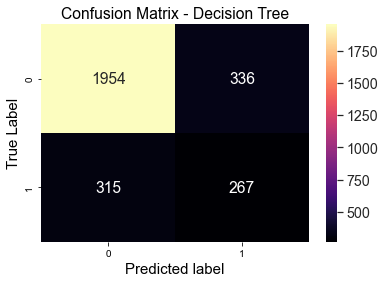

<Figure size 720x504 with 0 Axes>

In [33]:
matrix_df = pd.DataFrame(confusion_matrix(y_test,dtree_predict))#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

### Tuning the parameters

In [34]:
dtc_new = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 10, min_samples_leaf = 6 , max_features = 'sqrt', random_state = 1)
dtc_new.fit(X_train,y_train)
dtc_predict=dtc_new.predict(X_test)

****Hyperparameters to train in the decision tree**

We can import the Decision Tree Classifier from the sklearn library and change the default parameter values. 

**Criterion** specifies the criteria on which we want to select the next node. The default criterion is the Gini index. It measures the probability of an instance being misclassified when chosen randomly. In contrast, entropy measures impurity or randomness in the data points.

**minsamplessplit** tells the model a minimum number of samples that can be split into the next level. The ideal value is between 8–10.

**minsamplesleaf** tells the model the minimum samples the next level should have. The ideal value is between 2–6. 

Other parameters, like **maxdepth, maxfeatures, and class_weight**, can also be tuned.

Let's evaluate the model's performance before and after tuning the parameters.

In [35]:
print(f" Classification report :\n {classification_report(y_test,dtc_predict)}")
print(f" Confusion Matrix  :\n {confusion_matrix(y_test,dtc_predict)}")

 Classification report :
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2290
           1       0.65      0.42      0.51       582

    accuracy                           0.84      2872
   macro avg       0.76      0.68      0.71      2872
weighted avg       0.82      0.84      0.82      2872

 Confusion Matrix  :
 [[2157  133]
 [ 337  245]]


In [36]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, dtc_predict))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, dtc_predict))

Accuracy (Test Set): 0.84
F1-Score (Test Set): 0.51


In [37]:
#Model performance before tuning parameters

#Accuracy (Test Set): 0.78  F1-Score (Test Set): 0.47

#Model performance after tuning parameters

#Accuracy (Test Set): 0.83  F1-Score (Test Set): 0.52